In [2]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt

rng = np.random

In [3]:
alpha     = 0.0001  # --- Learning rate
numIter   = 1000    # --- Number of gradient descent iterations
skipIter  = 50      # --- Number of iterations to skip for presenting the results

In [4]:
# --- Data
X = np.array([20.1, 7.1, 16.1, 14.9, 16.7, 8.8, 9.7, 10.3, 22, 16.2, 12.1, 10.3, 14.5, 12.4, 9.6, 12.2, 10.8, 14.7, 19.7, 11.2,	
              10.1, 11, 12.2, 9.2, 23.5, 9.4, 15.3, 9.6, 11.1, 5.3, 7.8, 25.3, 16.5, 12.6, 12, 11.5, 17.1, 11.2, 12.2, 10.6, 19.9, 
              14.5, 15.5, 17.4, 8.4, 10.3, 0.2, 12.5, 16.7, 8.5, 12.2	])
Y = np.array([31.5, 18.9, 35, 31.6, 22.6, 26.2, 14.1, 24.7, 44.8, 23.2, 31.4, 17.7, 18.4, 23.4, 22.6, 16.4, 21.4, 26.5, 31.7, 11.9, 
              20, 12.5, 18, 14.2, 37.6, 22.2, 17.8, 18.3, 28, 8.1, 14.7, 37.8, 15.7, 28.6, 11.7, 20.1, 30.1, 18.2, 17.2, 19.6, 29.2, 
              17.3, 28.2, 38.2, 17.8, 10.4, 19, 16.8, 21.5, 15.9, 17.7	])


In [5]:
# --- Random starting guess
m = tf.Variable(rng.randn())
b = tf.Variable(rng.randn())

# --- Linear model function y = m * x + b
def linearModel(x):
    return m * x + b

# --- Cost function
def costFunction(y_model, y_data):
    return tf.reduce_mean(tf.square(y_model - y_data))

# --- Setting the Stochastic Gradient Descent Optimizer
optimizer = tf.optimizers.SGD(alpha)

In [6]:
# --- Optimization step
def optimizationStep():
    # --- Uses GradientTape for automatic differentiation
    with tf.GradientTape() as g:
        y_model           = linearModel(X)
        costFunctionValue = costFunction(y_model, Y)

    # --- Compute gradients
    gradients = g.gradient(costFunctionValue, [m, b])
    
    # --- Update the unknowns m and b
    optimizer.apply_gradients(zip(gradients, [m, b]))

In [7]:
# --- Iterations loop
for iter in range(1, numIter + 1):

    optimizationStep()
    
    if iter % skipIter == 0:
        y_model           = linearModel(X)
        costFunctionValue = costFunction(y_model, Y)
        print("iteration number: %i, cost function: %f, m: %f, b: %f" % (iter, costFunctionValue, m.numpy(), b.numpy()))

iteration number: 50, cost function: 68.225380, m: 1.224222, b: 0.530033
iteration number: 100, cost function: 37.918400, m: 1.568746, b: 0.560625
iteration number: 150, cost function: 37.264454, m: 1.618592, b: 0.570941
iteration number: 200, cost function: 37.241322, m: 1.625460, b: 0.578292
iteration number: 250, cost function: 37.231632, m: 1.626060, b: 0.585205
iteration number: 300, cost function: 37.222248, m: 1.625746, b: 0.592047
iteration number: 350, cost function: 37.212894, m: 1.625300, b: 0.598873
iteration number: 400, cost function: 37.203560, m: 1.624834, b: 0.605689
iteration number: 450, cost function: 37.194241, m: 1.624366, b: 0.612498
iteration number: 500, cost function: 37.184944, m: 1.623899, b: 0.619299
iteration number: 550, cost function: 37.175671, m: 1.623432, b: 0.626093
iteration number: 600, cost function: 37.166420, m: 1.622965, b: 0.632879
iteration number: 650, cost function: 37.157185, m: 1.622499, b: 0.639658
iteration number: 700, cost function: 3

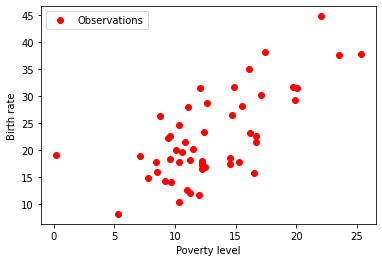

In [11]:
# --- Display results
plt.plot(X, Y, 'ro', label = 'Observations')
#plt.plot(X, np.array(m * X + b), label = 'Fitting')
plt.xlabel('Poverty level')
plt.ylabel('Birth rate')
plt.legend()
plt.show()